In [51]:
import pandas as pd

In [96]:
df=pd.read_csv("C:\\Users\\Hasan\\Downloads\\datasets_14872_228180_Admission_Predict_Ver1.1 (1).csv")
df.drop(columns="Serial No.",inplace=True)
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Most correleated feature to Chance of Admit(target) are CGPA and GRE score.

In [46]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


As seen above GRE score range from 290-340 whereas SOP and LOR range from 1-5, so lets standardize the columns
to bring in one general range.

In [97]:
x=df.drop(columns=["Chance of Admit "])
y=df[["Chance of Admit "]]

# standardization

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x)

In [99]:
x_scaled=scaler.transform(x)

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2)

# FInding the best model

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score


In [117]:
from sklearn.model_selection import cross_val_score
def accuracy(x,y):
    models=[['Decision Tree Regression :',DecisionTreeRegressor()],
           ['Linear Regression :',LinearRegression()],
           ['Random Forest Regression :',RandomForestRegressor()],
           ['Ada Boosting Regression :',AdaBoostRegressor()],
           ['Gradient Boosting Regression :', GradientBoostingRegressor()]]

    n=500
    p=7
    print("Different Model accuracy")
    print("\n")
    for name,model in models:
        model=model
        model.fit(x_train,y_train)
        predictions = model.predict(x_test)
        R2=r2_score(y_test, predictions)
        print("r2_score"+" of "+ name,R2)
        error=mean_squared_error(y_test, predictions)
        print("MSE"+" of "+ name,error)
        Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
        print("adjusted r score"+" of "+ name, Adj_r2)
        print("\n")

In [118]:
accuracy(x_train,y_train)

Different Model accuracy


r2_score of Decision Tree Regression : 0.6685707832690166
MSE of Decision Tree Regression : 0.006985
adjusted r score of Decision Tree Regression : 0.6638553269334133


r2_score of Linear Regression : 0.8485014552610801
MSE of Linear Regression : 0.0031928909148051855
adjusted r score of Linear Regression : 0.8463459881611362


r2_score of Random Forest Regression : 0.7857130994966167
MSE of Random Forest Regression : 0.00451618
adjusted r score of Random Forest Regression : 0.7826643021317312




C:\Users\Hasan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\Hasan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2_score of Ada Boosting Regression : 0.7339373320391431
MSE of Ada Boosting Regression : 0.005607374491715564
adjusted r score of Ada Boosting Regression : 0.7301518875762854


r2_score of Gradient Boosting Regression : 0.8050212467620892
MSE of Gradient Boosting Regression : 0.0041092532662027345
adjusted r score of Gradient Boosting Regression : 0.8022471588095172




C:\Users\Hasan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


So the best fit model is Linear Regression 

In [37]:
model=LinearRegression()
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x_train,y_train,cv=6,scoring="neg_mean_squared_error")
rmse=np.sqrt(-scores)

In [38]:
print(rmse.mean())
print(rmse.std())

0.06381169793669876
0.006131109917272739


Total error in the prediction will be around .07%, which is not bad on such a small data set.

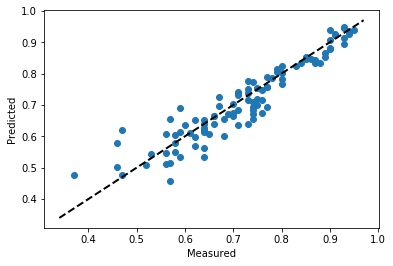

In [50]:
import matplotlib.pyplot as plt

model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [43]:
data = np.array([[316, 109, 4, 4, 4, 8, 2]])
x_test_scaled=scaler.transform(data)
my_prediction = model.predict(x_test_scaled)
my_prediction

C:\Users\Hasan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.69670237]])